# Aula 1 - Conhecendo os dados

## Entendendo o problema

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

In [2]:
dados_churn = pd.read_json('./data/dataset-telecon.json')
dados_churn.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [3]:
dados_churn['conta'][0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [4]:
pd.json_normalize(dados_churn['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [5]:
pd.json_normalize(dados_churn['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


## Transformando dados em uma tabela

In [6]:
with open('./data/dataset-telecon.json') as f:
    json_bruto = json.load(f)

In [1]:
#json_bruto

In [8]:
dados_normalizados = pd.json_normalize(json_bruto)
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


### Desafio: utilizando parâmetros do json_normalize

In [9]:
with open('./data/informacoes.json') as f:
    json_bruto_desafio = json.load(f)

In [10]:
json_bruto_desafio

{'nome': 'João',
 'idade': 28,
 'enderecos': [{'tipo': 'casa',
   'rua': 'Rua A',
   'numero': 123,
   'cidade': 'São Paulo'},
  {'tipo': 'trabalho',
   'rua': 'Rua B',
   'numero': 456,
   'cidade': 'Rio de Janeiro'}]}

In [11]:
df_desafio = pd.json_normalize(json_bruto_desafio, record_path = 'enderecos', meta = ['nome', 'idade'])
df_desafio

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


# Aula 2 - Transformação inicial dos dados

## Entendendo os dados

In [12]:
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


In [13]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [14]:
# dados_normalizados['conta.cobranca.Total'].astype(float)
# deixando comentado para que não haja erro quando rodar novamente

## Modificando o tipo da coluna

In [15]:
# a mensagem de erro anterior indica que há a string '' que signfica espaço em branco
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' ']

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,
2308,3213-VVOLG,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.35,
2930,4075-WKNIU,nao,feminino,0,sim,sim,0.0,sim,sim,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cheque pelo correio,73.35,
3134,4367-NUYAO,nao,masculino,0,sim,sim,0.0,sim,sim,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,25.75,
3203,4472-LVYGI,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,sim,nao,dois anos,sim,transferencia bancaria (automatica),52.55,
4169,5709-LVOEQ,nao,feminino,0,sim,sim,0.0,sim,nao,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,cheque pelo correio,80.85,


In [16]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,um ano,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


Não sei se foi algum erro no banco de dados que pode ter sido atualizado entre a gravação do curso e a data de hoje, mas na aula o indice 2075 também tinha valor de conta.contrato de dois anos. Vou corrigir essa célula para que haja uniformidade com a aula.

In [17]:
dados_normalizados.loc[2075, 'conta.contrato'] = 'dois anos'

In [18]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [19]:
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index

In [20]:
dados_normalizados.loc[idx, 'conta.cobranca.Total'] = 24 * dados_normalizados.loc[idx, 'conta.cobranca.mensal']

In [21]:
dados_normalizados.loc[idx, 'cliente.tempo_servico'] = 24

In [22]:
dados_normalizados.loc[idx, ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [23]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [24]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

## Identificando e tratando strings vazias

In [25]:
for col in dados_normalizados.columns:
    print(f'Coluna: {col}')
    print(dados_normalizados[col].unique())
    print('-' * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [26]:
dados_normalizados.query('Churn == ""')

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [27]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [28]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   o

In [29]:
dados_sem_vazio.reset_index(drop = True, inplace = True)

### Desafio: tratando os dados

In [30]:
with open('./data/dados.json') as f:
    json_bruto_desafio = json.load(f)

json_bruto_desafio

{'pessoas': [{'nome': 'João',
   'idade': '25',
   'endereco': {'rua': 'Rua A', 'numero': 123, 'cidade': 'São Paulo'},
   'telefones': ['11 1111-1111', '11 2222-2222']},
  {'nome': 'Maria',
   'idade': 30,
   'endereco': {'rua': '', 'numero': 456, 'cidade': 'Rio de Janeiro'},
   'telefones': ['21 3333-3333']}]}

In [31]:
df_desafio = pd.json_normalize(json_bruto_desafio, record_path = 'pessoas')
df_desafio

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [32]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 224.0+ bytes


In [33]:
df_desafio['idade'] = df_desafio['idade'].astype(int)
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int64 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(2), object(4)
memory usage: 224.0+ bytes


In [34]:
df_rua = df_desafio[df_desafio['endereco.rua'] != ""]
df_rua

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


# Aula 3 - Utilizando dados duplicados e nulos

## Identificando e tratando dados duplicados

In [35]:
dados_sem_vazio.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [36]:
dados_sem_vazio.duplicated().sum()

75

In [37]:
filtro_duplicadas = dados_sem_vazio.duplicated()
filtro_duplicadas

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [38]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [39]:
dados_sem_vazio.query('id_cliente == "4452-QIIEB"')

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
3106,4452-QIIEB,nao,masculino,0,nao,nao,7.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,cheque pelo correio,43.9,278.4
7117,4452-QIIEB,nao,masculino,0,nao,nao,7.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,cheque pelo correio,43.9,278.4


In [40]:
dados_sem_vazio.drop_duplicates(inplace = True)

In [41]:
dados_sem_vazio.duplicated().sum()

0

In [42]:
dados_sem_vazio.query('id_cliente == "4452-QIIEB"')

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
3106,4452-QIIEB,nao,masculino,0,nao,nao,7.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,cheque pelo correio,43.9,278.4


Ou seja, removeu apenas o dado duplicado e não o original

## Identificando e substituindo dados nulos

In [43]:
dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [45]:
dados_sem_vazio.isna().sum().sum()

114

In [46]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis = 1)]
# dataframe com as amostras que possuem pelo menos um valor nulo nas colunas

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


In [47]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

In [48]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [49]:
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(dados_sem_vazio['conta.cobranca.Total']/dados_sem_vazio['conta.cobranca.mensal']), inplace = True
)

In [50]:
dados_sem_vazio[filtro][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.mensal']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.mensal
9,66.0,90.45,90.45
176,13.0,29.30,29.30
181,5.0,63.95,63.95
751,60.0,101.05,101.05
3523,14.0,76.10,76.10
5273,6.0,20.60,20.60
5276,49.0,73.85,73.85
6134,29.0,69.05,69.05


In [51]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

## Retirando os dados nulos

In [52]:
dados_sem_vazio['conta.contrato'].value_counts()

mes a mes    3861
dois anos    1688
um ano       1463
Name: conta.contrato, dtype: int64

In [53]:
colunas_dropar = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento']

In [54]:
dados_sem_vazio[colunas_dropar].isna().any(axis = 1).sum()

37

In [55]:
dados_sem_vazio.dropna(subset = colunas_dropar)

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7039,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7040,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7041,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [56]:
df_sem_nulo = dados_sem_vazio.dropna(subset = colunas_dropar).copy()

In [57]:
df_sem_nulo.reset_index(drop = True, inplace = True)

In [58]:
df_sem_nulo.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

### Desafio: tratando uma base de dados

In [59]:
with open('./data/cursos_cadastrados.json') as f:
    json_bruto_desafio = json.load(f)

df_desafio = pd.json_normalize(json_bruto_desafio)

df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


Identificar e remover amostras que apresentem os seguintes problemas:
- valores nulos
- duplicatas
- strings vazias
- conversão de tipos

In [60]:
df_desafio.isna().sum()

curso                 0
categoria             0
carga_horaria         1
concluintes           1
data_inicio           1
data_conclusao        1
descricao             1
preco                 1
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [61]:
df_desafio[['carga_horaria','concluintes','data_inicio','data_conclusao','descricao','preco']]

,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco
0,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90
1,None,None,None,None,None,None
2,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9
3,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9
4,20 horas,30,,,Curso de inglês para negócios,69.9
5,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90


In [62]:
df_desafio.dropna(inplace = True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [63]:
df_desafio[df_desafio.duplicated()]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [64]:
df_desafio.query('curso == "Introdução à programação"')

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [65]:
df_desafio.drop_duplicates(inplace = True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


In [66]:
df_desafio.columns[0]

'curso'

In [67]:
df_desafio.replace('', pd.NA, inplace = True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,<NA>,2022-04-01,<NA>,Curso avançado sobre inteligência artificial c...,129.9,<NA>,contato@emailaleatorio.com,<NA>
4,Inglês para negócios,Idiomas,20 horas,30,<NA>,<NA>,Curso de inglês para negócios,69.9,John Smith,<NA>,<NA>


In [68]:
df_desafio.dropna(inplace = True)
df_desafio

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [69]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      object
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: object(11)
memory usage: 192.0+ bytes


In [70]:
df_desafio['concluintes'] = df_desafio['concluintes'].astype(int)
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   curso               2 non-null      object
 1   categoria           2 non-null      object
 2   carga_horaria       2 non-null      object
 3   concluintes         2 non-null      int64 
 4   data_inicio         2 non-null      object
 5   data_conclusao      2 non-null      object
 6   descricao           2 non-null      object
 7   preco               2 non-null      object
 8   instrutor.nome      2 non-null      object
 9   instrutor.email     2 non-null      object
 10  instrutor.telefone  2 non-null      object
dtypes: int64(1), object(10)
memory usage: 192.0+ bytes


In [71]:
df_desafio['preco'] = df_desafio['preco'].astype(float)
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   curso               2 non-null      object 
 1   categoria           2 non-null      object 
 2   carga_horaria       2 non-null      object 
 3   concluintes         2 non-null      int64  
 4   data_inicio         2 non-null      object 
 5   data_conclusao      2 non-null      object 
 6   descricao           2 non-null      object 
 7   preco               2 non-null      float64
 8   instrutor.nome      2 non-null      object 
 9   instrutor.email     2 non-null      object 
 10  instrutor.telefone  2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 192.0+ bytes


In [72]:
df_desafio['data_inicio'] = pd.to_datetime(df_desafio['data_inicio'], format = '%Y-%m-%d')
df_desafio['data_inicio']

0   2022-01-01
2   2022-03-01
Name: data_inicio, dtype: datetime64[ns]

In [73]:
df_desafio['data_conclusao'] = pd.to_datetime(df_desafio['data_conclusao'], format = '%Y-%m-%d')
df_desafio['data_conclusao']

0   2022-01-20
2   2022-03-31
Name: data_conclusao, dtype: datetime64[ns]

In [74]:
df_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 192.0+ bytes


# Aula 4 - Lidando com os outliers

## Identificando os outliers

In [75]:
df_sem_nulo.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


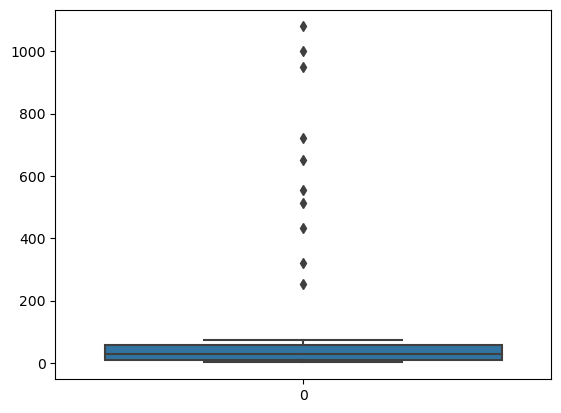

In [76]:
sns.boxplot(df_sem_nulo['cliente.tempo_servico']);

In [77]:
Q1 = df_sem_nulo['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_nulo['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5*IQR)
limite_superior = Q3 + (1.5*IQR)

In [78]:
outliers_index = (df_sem_nulo['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulo['cliente.tempo_servico'] > limite_superior)

In [79]:
df_sem_nulo[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

## Substituindo valores para os outliers

In [80]:
df_sem_out = df_sem_nulo.copy()

In [81]:
df_sem_out[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     950.0
1956     254.0
1958     321.0
1963     650.0
1966     721.0
1970     555.0
1973     433.0
1974     512.0
Name: cliente.tempo_servico, dtype: float64

Quer dizer, provavelmente foi erro de preenchimento. Podemos fazer o processo igual vimos antes, realizar a divisão do total da cobrança pela cobrança mensal para ter o tempo de serviço. Agora não é para descobrir valores faltantes, e sim os valores para outliers.

(será que faz sentido aplicar essa divisão para a coluna toda? há o risco do caso contrário em algumas observações, a cobrança total estar com valor errado e aí a divisão alterar tempos de assinatura corretos)

In [82]:
df_sem_out.loc[outliers_index, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index, 'conta.cobranca.Total'] / df_sem_out.loc[outliers_index, 'conta.cobranca.mensal']
)

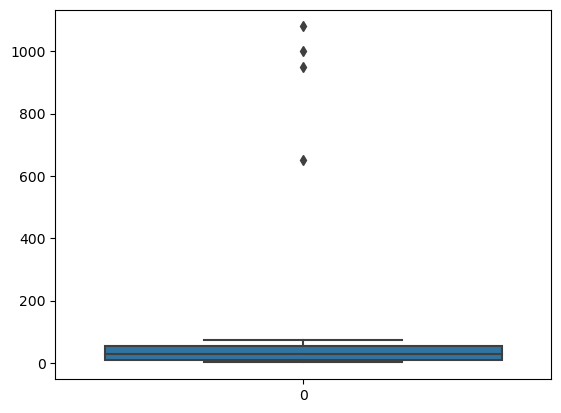

In [83]:
sns.boxplot(df_sem_out['cliente.tempo_servico']);

In [84]:
df_sem_out[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     951.0
1956       2.0
1958      43.0
1963     650.0
1966      44.0
1970       7.0
1973       4.0
1974       1.0
Name: cliente.tempo_servico, dtype: float64

In [85]:
df_sem_out[outliers_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


#### Para saber mais: formas de identificar outliers
##### Z-score

In [86]:
# Dados de exemplo
data = np.array([10, 20, 30, 40, 150, 50, 60, 70, 80, 90, 100, 350])

# Cálculo do z-score
z_scores = (data - np.mean(data)) / np.std(data)

# Limite para considerar um dado como outlier
limite = 3

# Identificação dos outliers
outliers = data[np.abs(z_scores) > limite]

print("Outliers encontrados:", outliers)

Outliers encontrados: [350]


##### Regra dos 3 sigmas

In [87]:
# Criar um array com os dados
dados = np.array([0, 10, 12, 13, 15, 16, 18, 20, 22, 25, 30, 35, 40, 50, 350])

# Calcular a média e o desvio padrão do conjunto de dados
media = np.mean(dados)
desvio_padrao = np.std(dados)

# Definir o limite superior e inferior para identificar os outliers
limite_superior = media + (3 * desvio_padrao)
limite_inferior = media - (3 * desvio_padrao)

# Identificar os outliers no conjunto de dados
outliers = dados[(dados > limite_superior) | (dados < limite_inferior)]

print("Outliers:", outliers)

Outliers: [350]


##### Análise de dispersão

Outliers encontrados: []


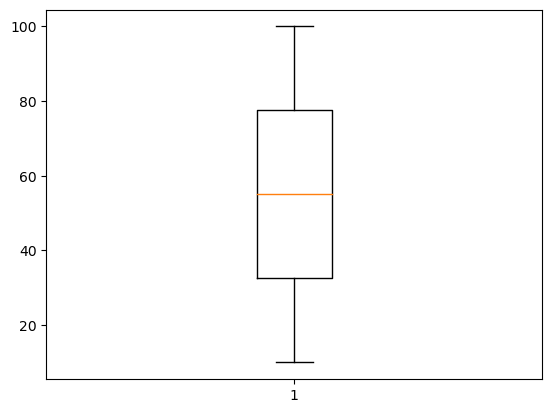

In [88]:
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Criação do boxplot
fig, ax = plt.subplots()
ax.boxplot(data)

# Identificação dos outliers
outliers = data[(data < np.percentile(data, 25) - (1.5 * (np.percentile(data, 75) - np.percentile(data, 25)))) |
                (data > np.percentile(data, 75) + (1.5 * (np.percentile(data, 75) - np.percentile(data, 25))))]

print("Outliers encontrados:", outliers)

## Removendo outliers

In [89]:
df_sem_out[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     951.0
1956       2.0
1958      43.0
1963     650.0
1966      44.0
1970       7.0
1973       4.0
1974       1.0
Name: cliente.tempo_servico, dtype: float64

In [90]:
Q1 = df_sem_out['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_out['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5*IQR)
limite_superior = Q3 + (1.5*IQR)

outliers_index = (df_sem_out['cliente.tempo_servico'] < limite_inferior) | (df_sem_out['cliente.tempo_servico'] > limite_superior)

# truque: ctrl + shift + L

In [91]:
df_sem_out[outliers_index]['cliente.tempo_servico']

1945    1080.0
1946    1000.0
1952     951.0
1963     650.0
Name: cliente.tempo_servico, dtype: float64

In [92]:
df_sem_out = df_sem_out[~outliers_index]
# ~ serve para dizer 'pegue tudo que não corresponde a esse slice'

df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


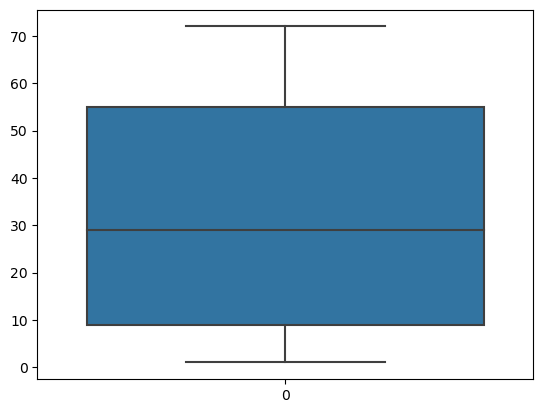

In [93]:
sns.boxplot(df_sem_out['cliente.tempo_servico']);

In [94]:
df_sem_out.reset_index(drop = True, inplace = True)

### Desafio: identificando fraudes

In [95]:
# criando um DataFrame com 30 transações aleatórias
df_desafio = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [96]:
df_desafio

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"
5,6,913,2022-01-06,"Nova Iorque, EUA"
6,7,250,2022-01-07,"São Paulo, Brasil"
7,8,400,2022-01-08,"São Paulo, Brasil"
8,9,200,2022-01-09,"São Paulo, Brasil"
9,10,150,2022-01-10,"Rio de Janeiro, Brasil"


In [97]:
df_desafio['Valor da transação']

0     100
1     200
2     150
3     500
4     300
5     913
6     250
7     400
8     200
9     150
10    200
11    200
12    400
13    300
14    150
15    301
16    805
17    300
18    400
19    250
20    150
21    100
22    500
23    600
24    200
25    350
26    100
27    250
28    800
29    250
Name: Valor da transação, dtype: int64

In [98]:
df_desafio['Valor da transação'].quantile(.75)

400.0

In [99]:
Q1 = df_desafio['Valor da transação'].quantile(.25)
Q3 = df_desafio['Valor da transação'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - (1.5*IQR)
limite_superior = Q3 + (1.5*IQR)

outliers_index = (df_desafio['Valor da transação'] < limite_inferior) | (df_desafio['Valor da transação'] > limite_superior)

In [100]:
df_desafio[outliers_index]

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


O código funciona, vamos encapsulá-lo em função:

In [101]:
def identifica_outlier(df, col):

    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - (1.5*IQR)
    limite_superior = Q3 + (1.5*IQR)

    outliers_index = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return(outliers_index)

In [102]:
identifica_outlier(df = df_desafio, col = 'Valor da transação')

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


# Aula 5 - Trabalhando com variáveis categóricas

## Substituindo valores

In [103]:
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [104]:
df_sem_id = df_sem_out.drop('id_cliente', axis = 1).copy()
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [105]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print('-' * 30)

Coluna: Churn
['nao' 'sim']
------------------------------
Coluna: cliente.genero
['masculino' 'feminino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['nao' 'sim']
------------------------------
Coluna: cliente.dependentes
['nao' 'sim']
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
['sim' 'nao']
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_onlin

In [106]:
colunas = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

In [107]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1
}

In [108]:
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [109]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print('-' * 30)

Coluna: Churn
[0 1]
------------------------------
Coluna: cliente.genero
[0 1]
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
[0 1]
------------------------------
Coluna: cliente.dependentes
[0 1]
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
[1 0]
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
---------

## One Hot Encoder (dummy)

In [110]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [111]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [112]:
df_sem_id.info()
# get_dummies vai interpretar tudo que é object como variaveis categoricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7002 non-null   int64  
 1   cliente.genero                 7002 non-null   int64  
 2   cliente.idoso                  7002 non-null   int64  
 3   cliente.parceiro               7002 non-null   int64  
 4   cliente.dependentes            7002 non-null   int64  
 5   cliente.tempo_servico          7002 non-null   float64
 6   telefone.servico_telefone      7002 non-null   int64  
 7   telefone.varias_linhas         7002 non-null   object 
 8   internet.servico_internet      7002 non-null   object 
 9   internet.seguranca_online      7002 non-null   object 
 10  internet.backup_online         7002 non-null   object 
 11  internet.protecao_dispositivo  7002 non-null   object 
 12  internet.suporte_tecnico       7002 non-null   o

In [113]:
pd.get_dummies(df_sem_id)

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,1,0,0,0,0,1,0,0,1,0
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,0,0,1,0,1,0,0,1,0,0
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,1,0,0,0,1,0,0,0,1,0
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,0,0,1,1,0,0,0,0,1,0


In [114]:
df_dummies = pd.get_dummies(df_sem_id).copy()

In [115]:
df_dummies.columns

Index(['Churn', 'cliente.genero', 'cliente.idoso', 'cliente.parceiro',
       'cliente.dependentes', 'cliente.tempo_servico',
       'telefone.servico_telefone', 'conta.faturamente_eletronico',
       'conta.cobranca.mensal', 'conta.cobranca.Total',
       'telefone.varias_linhas_nao',
       'telefone.varias_linhas_sem servico de telefone',
       'telefone.varias_linhas_sim', 'internet.servico_internet_DSL',
       'internet.servico_internet_fibra otica',
       'internet.servico_internet_nao', 'internet.seguranca_online_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.seguranca_online_sim', 'internet.backup_online_nao',
       'internet.backup_online_sem servico de internet',
       'internet.backup_online_sim', 'internet.protecao_dispositivo_nao',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.protecao_dispositivo_sim', 'internet.suporte_tecnico_nao',
       'internet.suporte_tecnico_sem servico de internet',
     

In [116]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente.genero                                              7002 non-null   int64  
 2   cliente.idoso                                               7002 non-null   int64  
 3   cliente.parceiro                                            7002 non-null   int64  
 4   cliente.dependentes                                         7002 non-null   int64  
 5   cliente.tempo_servico                                       7002 non-null   float64
 6   telefone.servico_telefone                                   7002 non-null   int64  
 7   conta.faturamente_eletronico                                7002 non-null   int64  
 8 

##### Para saber mais: parâmetros do get_dummies()

In [117]:
# Criando um DataFrame de exemplo
df = pd.DataFrame({'cor': ['vermelho', 'azul', 'verde', 'vermelho'],
                   'tamanho': ['pequeno', 'médio', 'grande', 'médio'],
                   'formato': ['quadrado', 'redondo', 'redondo', 'quadrado']})

# Transformando as colunas categóricas em variáveis numéricas binárias
df_dummies = pd.get_dummies(df, columns=['cor', 'tamanho'], prefix=['cor', 'tam'], prefix_sep='-', drop_first=True)

df

,cor,tamanho,formato
0,vermelho,pequeno,quadrado
1,azul,médio,redondo
2,verde,grande,redondo
3,vermelho,médio,quadrado


In [118]:
df_dummies

,formato,cor-verde,cor-vermelho,tam-médio,tam-pequeno
0,quadrado,0,1,0,1
1,redondo,0,0,1,0
2,redondo,1,0,0,0
3,quadrado,0,1,1,0
